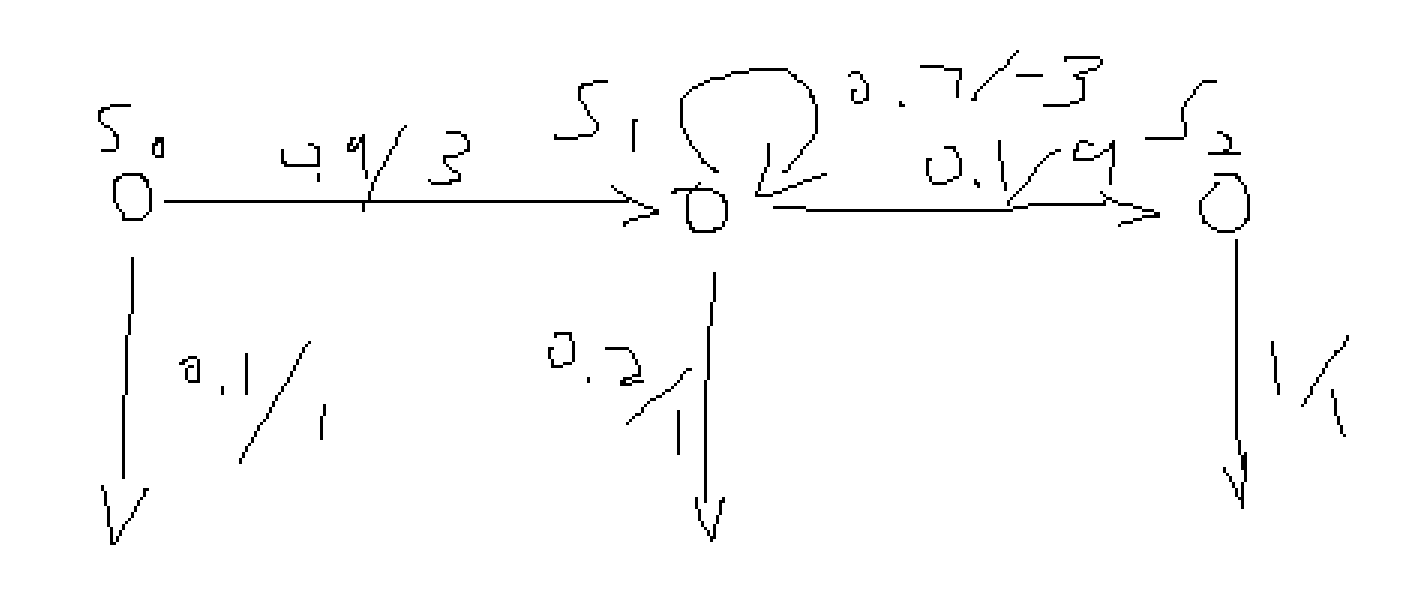

In [1]:
class node():
    def __init__(self, prb, nxt, rwd):
        self.nxt = nxt
        self.rwd = rwd
        self.prb = prb

In [3]:
n = []
n.append(node((0.9,0.1), (1,-1), (3,1)))
n.append(node((0.1,0.7,0.2), (2,1,-1), (9,-3,1)))
n.append(node((1,), (-1,), (1,)))

In [ ]:
def recursive_func(state, reward):
    s_max = 0
    for i in range(state.nxt):
        tmp = reursive_func(state.nxt[i],)

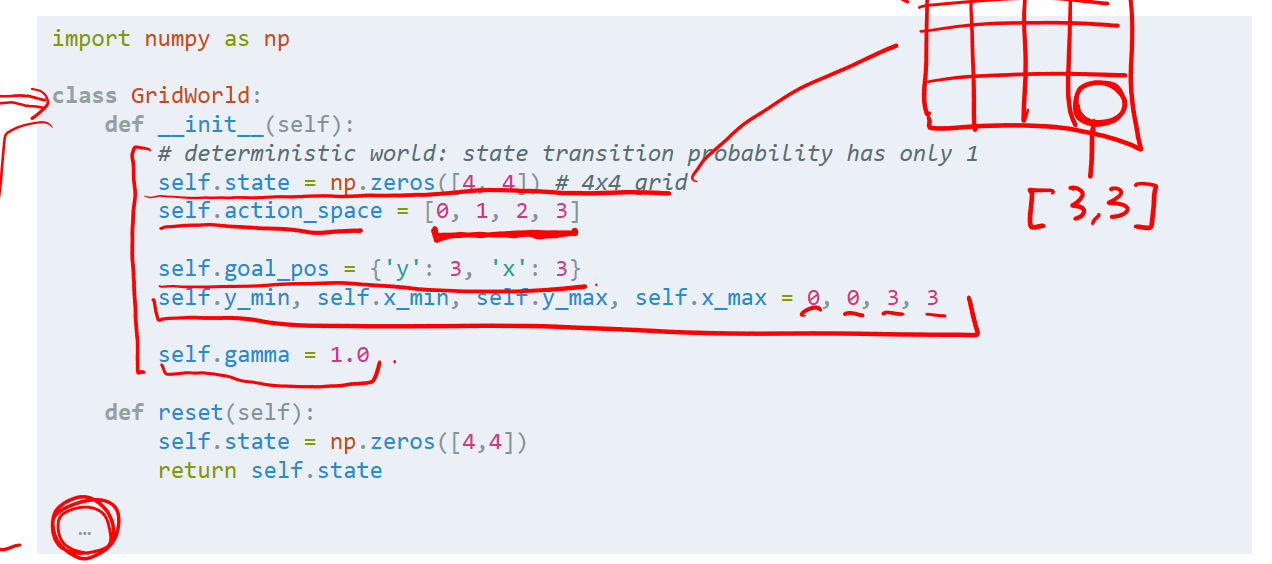

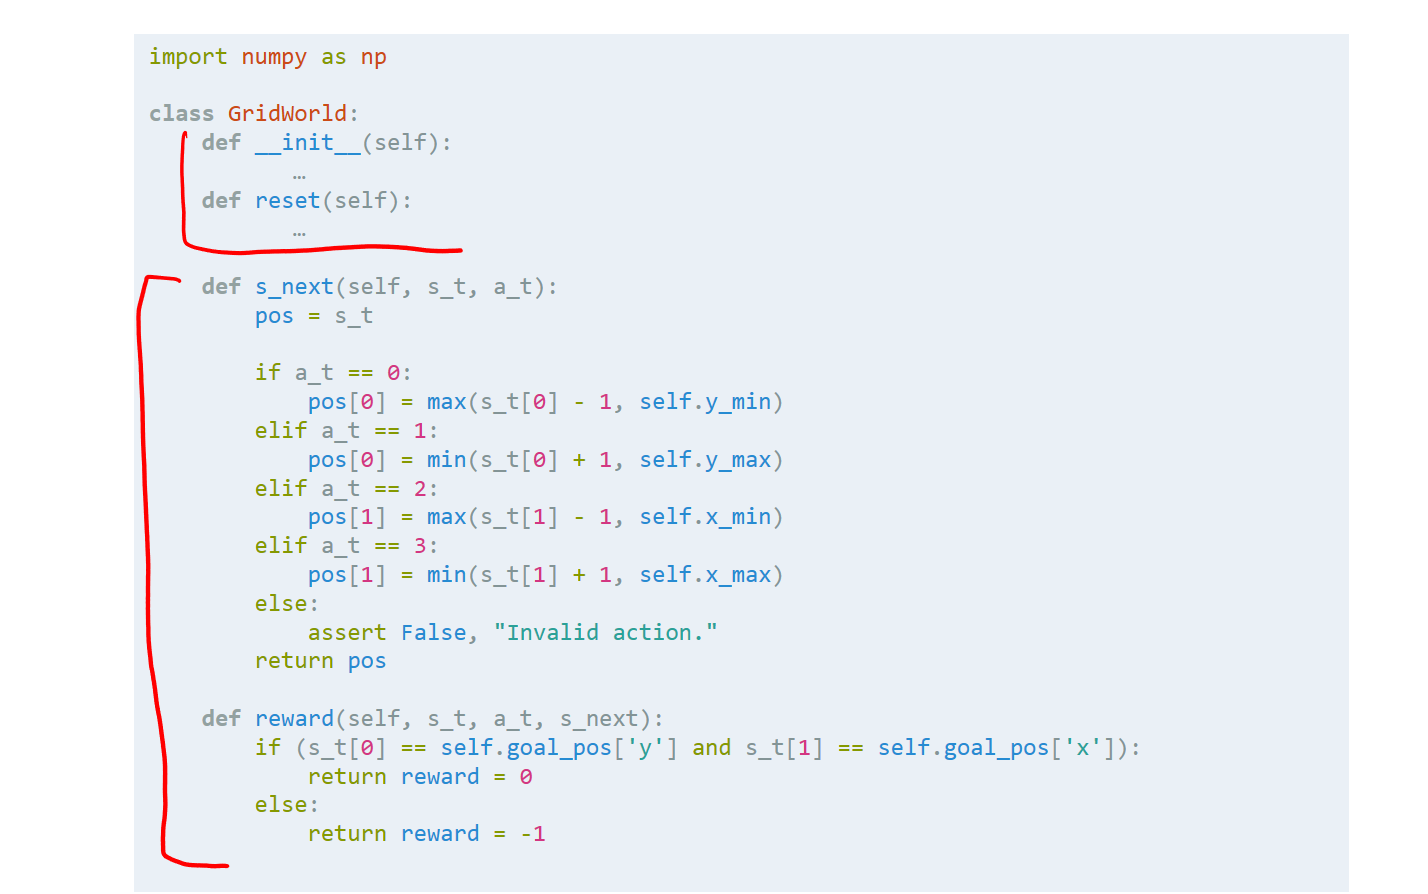

In [1]:
import numpy as np

In [2]:
actions = ((1,0), (-1,0), (0,-1), (0,1))
class GridWorld:
    def __init__(self):
        self.state = np.zeros((4,4))
        self.action_space = [0,1,2,3,]
        self.goal_pos = {'y':3, 'x':3}
        self.y_min, self.x_min, self.y_max, self.x_max = 0, 0, 3, 3
        self.gamma = 1
    def reset(self):
        self.state = np.zeros((4,4))
        return self.state
    def s_next(self, s_t, a_t):
        pos = s_t
        if a_t == 0:
            pos[0] = max(s_t[0]-1, self.y_min)
        elif a_t == 1:
            pos[0] = min(s_t[0]+1, self.y_max)
        elif a_t == 2:
            pos[1] = max(s_t[1]-1, self.x_min)
        elif a_t == 3:
            pos[1] = min(s_t[1]+1, self.x_max)
        else:
            assert False, "Invalid Action"
        return pos
    def reward(self, s_t, a_t, s_next):
        if (s_t[0] == self.goal_pos['y'] and s_t[1] == self.goal_pos['x']):
            reward = 0
            return reward
        else:
            reward = -1
            return reward
    def bellman_expectation(self, state, probs, discount):
        value = 0
        for c in range(4):
            s_1, reward = self.s_next(state, c)
            value += probs[c] * (reward + discount * self.state_value[s_1])
        return value

In [3]:
def policy_evaluation(env, policy=None, steps=1, discount=1., in_place=False):
    for k in range(steps):
        values = env.state if in_place else np.empty_like(env.state)
        for i in range(len(env.state)):
            for j in range(len(env.state[i])):
                state = [i, j]
                value = env.bellman_expectation(state, policy[i, j], discount)
                values[i, j] = value * discount
        env.state = values
    return env.state

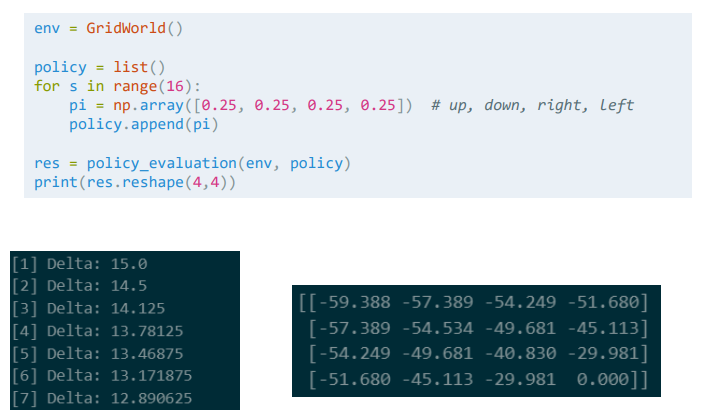

In [4]:
env = GridWorld()
policy = list()
for s in range(16):
    pi = np.array([0.25,0.25,0.25,0.25])
    policy.append(pi)
#print(policy)  
policy = np.array(policy)
res = policy_evaluation(env, policy)
print(res.reshape(4,4))

IndexError: invalid index to scalar variable.